# Machine Learning for Mobile Communication Systems - Data exploration

The dataset reports the activity of one LTE cell in Madrid, El Rastro neighborhood. 
The observation period comprises the temporal window between the end of June and the beginning of August 2016 (06/29 - 08/09) that includes six weeks of information.

The dataset contains the following information:
 - 0 - **overalltime**: in seconds, starting from the initial date of the measurements (29/06/2016)
 - 1 - **overallusers**: number of transmitting users
 - 2 - **overallrbdw**: total number of resource blocks in downlink
 - 3 - **overallrbdwmean**: mean number of resource blocks in downlink
 - 4 - **overallrbdwstd**: standard deviation of resource blocks in downlink
 - 5 - **overallratedw**: rate (bit/s) in downlink
 - 6 - **overallratedwmean**: mean rate (bit/s) in downlink
 - 7 - **overallratedwstd**: standard deviation of rate in downlink
 - 8 - **overallmsgdw**: number of messages in downlink
 - 9 - **overallretxdw**: number of retransmitted packets in downlink
 - 10 - **overallrbup**: total number of resource blocks in uplink
 - 11 - **overallrbupmean**: mean number of resource blocks in uplink
 - 12 - **overallrbupstd**: standard deviation of resource blocks in uplink
 - 13 - **overallrateup**: rate (bit/s) in uplink
 - 14 - **overallrateupmean**: mean rate (bit/s) in uplink
 - 15 - **overallrateupstd**: standard deviation rate (bit/s) in downlink
 - 16 - **overallmsgup**: number of messages in uplink
 - 17 - **overallretxup**: number of retransmitted packets in uplink 

 Keywords, high level meaning:
  - Resource Block: essentially is a resource that must allocated when an application needs more data to be transmitted (i.e. the base stations allocates more bandwidth to transmit more symbols)
  - message: ?
  - packet: packet of information, does not contain always the same amount of data, it always depends on the application, bandwidth, etc...


## Problem Statement
let us split D in $6$ portions $(D_1, D_2, D_3, D_4, D_5, D_6)$, being one portion equal to one week
(604800 seconds). It is requested:
1. for each $D_i, (i=1, 2, 3, 4, 5, 6)$, build one model based on artificial neural networks able to
automatically predict `overallusers, overallratedw, overallrateup`, at time instant $t+1, t+2, \dots, t+N$,
with $N=10$. Select the most appropriate inputs to get the outputs requested with the lowest error.
You can use one of the artificial neural network architectures introduced in the lessons (e.g., Multi-
layer Perceptrons, Convolutional Neural Networks, Recurrent Neural Networks) or a combination
of those.
2. create a federated global model using FedAvg algorithm, which is merging the local knowledge
of the 6 datasets $D_i$ and is performing the same task, i.e., prediction of `overallusers, overallratedw,
overallrateup`, at time instant $t+1, t+2, \dots, t+N$, with $N=10$.
3. Evaluate the accuracy of the 4 (?) local models and compare it with that achieved by the global
model. For this, carefully identify the test sets to be used for the evaluation.

In [23]:
import os
import datetime

import numpy as np
import  matplotlib.pyplot as plt
import pandas as pd

In [6]:
data_path = "data"
data_file_name = "rastro.csv"

In [9]:
# load csv file in data with pandas

def load_data_pandas(file_name):
    return pd.read_csv(os.path.join(data_path, file_name))

def load_data_numpy(file_name):
    return np.loadtxt(os.path.join(data_path, file_name), delimiter=',')

# load data
data = load_data_pandas(data_file_name)

In [21]:
data.head(10)

,overalltime,overallusers,overallrbdw,overallrbdwmean,overallrbdwstd,overallratedw,overallratedwmean,overallratedwstd,overallmsgdw,overallretxdw,overallrbup,overallrbupmean,overallrbupstd,overallrateup,overallrateupmean,overallrateupstd,overallmsgup,overallretxup
0,82561,9,319,12.269231,11.622591,39608,1523.384615,3244.587901,26,0,1478,6.627803,8.242416,245424.0,1100.556054,2047.784524,191.0,32.0
1,82562,9,603,11.377358,11.724771,34440,649.811321,1168.622217,50,3,1169,5.488263,5.772912,140032.0,657.427230,673.679666,165.0,48.0
2,82563,9,545,12.976190,14.322910,60688,1444.952381,3106.136530,41,1,814,3.786047,6.354099,163304.0,759.553488,1388.000197,157.0,58.0
3,82564,10,725,10.661765,11.306596,55736,819.647059,1822.320480,68,0,1236,3.340541,3.289588,246064.0,665.037838,516.984506,316.0,54.0
4,82565,11,15402,40.638522,16.144476,4405688,11624.506596,8239.047939,332,47,2825,6.907090,8.484483,333720.0,815.941320,868.953391,368.0,41.0
5,82566,10,27526,45.648425,10.935287,10755664,17836.922056,7207.307349,563,40,1812,4.507463,2.731765,265560.0,660.597015,383.391925,361.0,41.0
6,82567,12,2173,28.220779,20.642077,570656,7411.116883,8215.515504,71,6,1002,3.643636,1.833465,177536.0,645.585455,289.170351,236.0,39.0
7,82568,10,393,15.115385,15.953249,60816,2339.076923,4569.509286,26,0,689,3.664894,2.720381,116240.0,618.297872,375.499719,152.0,36.0
8,82569,9,363,21.352941,20.645645,75736,4455.058824,5735.621942,17,0,457,3.026490,2.193770,77936.0,516.132450,424.039097,101.0,50.0
9,82570,7,17841,40.732877,15.185335,4360528,9955.543379,4948.471079,433,5,2404,7.856209,6.577576,206528.0,674.928105,546.418732,278.0,28.0


In [30]:
def get_date_from_overalltime(overalltime):
    # Set the starting date as 29 june 2016 using the datetime module
    start_date = datetime.datetime(2016, 6, 29)

    # Get the first date which is the starting date plus the number of seconds
    date = start_date + datetime.timedelta(seconds=overalltime)
    return date

print(str(get_date_from_overalltime(82561)))

2016-06-29 22:56:01


In [14]:
# Summary statistics of the data
data.describe()

,overalltime,overallusers,overallrbdw,overallrbdwmean,overallrbdwstd,overallratedw,overallratedwmean,overallratedwstd,overallmsgdw,overallretxdw,overallrbup,overallrbupmean,overallrbupstd,overallrateup,overallrateupmean,overallrateupstd,overallmsgup,overallretxup
count,2.389749e+06,2.389749e+06,2.389749e+06,2.131143e+06,2.131143e+06,2.389749e+06,2.131143e+06,2.131143e+06,2.389749e+06,2.389749e+06,2.389749e+06,2.376704e+06,2.376704e+06,2.389747e+06,2.376702e+06,2.376702e+06,2.389748e+06,2.389748e+06
mean,1.370620e+06,4.757134e+00,1.045938e+03,1.369516e+01,9.902240e+00,2.587851e+05,2.264550e+03,2.423769e+03,3.517717e+01,1.907851e+00,7.935114e+02,4.115694e+00,3.982954e+00,8.749586e+04,4.331857e+02,5.303794e+02,1.016137e+02,5.679121e+01
std,7.468662e+05,3.205597e+00,3.845251e+03,1.110065e+01,7.060188e+00,1.142466e+06,4.117831e+03,3.514114e+03,8.476111e+01,7.976470e+00,1.664328e+03,2.936528e+00,3.025049e+00,2.673897e+05,4.195570e+02,5.416844e+02,1.261370e+02,8.683475e+01
min,8.256100e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.080720e+05,2.000000e+00,9.000000e+00,6.000000e+00,3.105295e+00,4.160000e+02,2.360000e+02,1.678571e+02,2.000000e+00,0.000000e+00,1.110000e+02,2.359375e+00,1.753814e+00,1.072000e+04,2.372864e+02,2.965250e+02,1.500000e+01,1.300000e+01
50%,1.412272e+06,4.000000e+00,1.140000e+02,1.044444e+01,1.038775e+01,5.240000e+03,4.968889e+02,5.769991e+02,1.100000e+01,0.000000e+00,3.630000e+02,3.433735e+00,3.641085e+00,4.115200e+04,4.018286e+02,3.978654e+02,6.000000e+01,2.700000e+01
75%,2.022124e+06,6.000000e+00,4.860000e+02,1.800000e+01,1.618316e+01,4.967200e+04,2.114286e+03,3.815111e+03,3.200000e+01,0.000000e+00,9.680000e+02,5.247423e+00,5.398765e+00,1.048000e+05,5.782222e+02,6.146724e+02,1.430000e+02,5.400000e+01
max,2.631894e+06,3.200000e+01,4.803300e+04,5.100000e+01,3.323402e+01,4.767835e+07,6.957288e+04,3.871551e+04,1.956000e+03,5.370000e+02,4.135400e+04,4.800000e+01,3.323402e+01,1.774178e+07,2.140142e+04,1.427790e+04,2.395000e+03,1.124000e+03


In [19]:
len(data)

2389749

## What to do?
Cose da fare:
1. Capire bene che modello utilizzare:
    - CNN 1 Dimensional:
      - Causal / Non causal
      - Dilated?
    - Recurrent
      - LSTM
      - GRU
      - Attention
    - Transformer?
2. sulla base di questo capire quali funzioni di preprocessing implementare (crop, resize, normalizzazione, ecc.). Specialmente pensare a:
      - Sequence length ($l$): Visto che bisogna predirre i 10 secondi futuri, ci sarà bisogno almeno di 50/60 secondi di sequenza in input. Direi di partire da $l=50$, e scrivere codice pensando che bisognerà sperimentare anche con sequenze di lunghezze diverse (idealmente sarebbe bello vedere risultati per [30,40,50,60,70])
      - Sequence step size ($s$): farei circa di un terzo circa della sequence length. Quindi ad occhio potrebbe essere $s=15$.
      - Quali features tenere e quali scartare: questo aspetto è più delicato. Si può iniziare con tutte, e provare a rimuovere dopo.
3. Fare classe Rastro_Dataset che preveda un argomento agent_idx (dove agent_idx è l'indice dell'agente in [0,1,2,3,4,5]).
   - Se `agent_idx = -1` allora il dataset deve essere CENTRALIZZATO (contenere tutti i dati)
   - Se `agent_idx = i` \in [0,1,2,3,4,5] allora il dataset deve contenere solo i dati dell'agente i-esimo
4. Implementare primi esperimenti con dataset centralizzato
5. Implementare FedAvg e training federated

Use this paper for reference for experimental results:
https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8581000



## PROBLEM: How do I make the splitting?

1. Take all the crops in one week, then split randomly those in train validation and test

The problem here is that I might have two subsequent samples (with fairly big overlap) in two different splits -> information leakage

2. Take first portion of the sequence for training, second portion for validation and third portion for test

The problem here is that one portion means one specific part of the week (we are reasoning w.r.t a single agent). But I want the DL model to be trained from ALL the days of the week, not just from one subportion, since I think different days of the week might have different patterns to learn from.

### Potential solution:

Subdivide the whole week in $m$ subsets, each containing mobile data sequences spanning 1 hour of measurements (or some other value) in total. Each of these subsets ONLY contains those sequences that are ENTIRELY included in this defined timespan. If a sequence contains samples taken in two different hours, we discard it (e.g sequence that goes from 12:59:45 to 13:00:35 will be discarded).
We then take this new collection of subsets and randomly split those in train, validation and test subsets.

In this way, each split contains data belonging to an etherogeneous set of days/hours, and we are sure that there is no leakage of information between the sets.




NameError: name 'save_path' is not defined

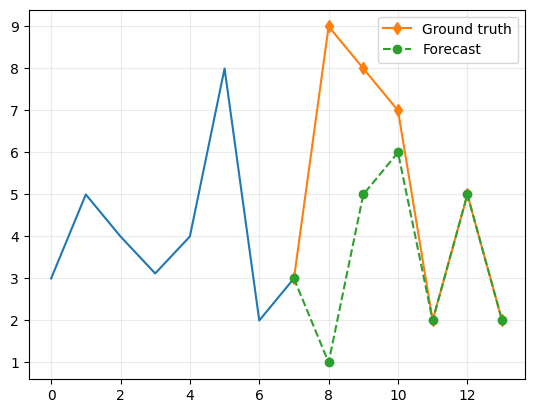

In [1]:
import matplotlib.pyplot as plt

last_elements = [3,5,4,3.12,4,8,2,3]
ground_truth = [9,8,7,2,5,2]
forecast = [1,5,6,2,5,2]

xcoord_pred = list(range(len(last_elements) -1 , len(last_elements) + len(ground_truth)))
plt.plot(last_elements)
plt.plot(xcoord_pred, [last_elements[-1]] + ground_truth, 'd-', label='Ground truth')
plt.plot(xcoord_pred, [last_elements[-1]] + forecast, 'o--', label='Forecast',)
plt.grid(alpha=0.25)

plt.legend()

plt.savefig(save_path)
plt.show()


Missing data

Features 3,4,6,7 have a lot of Nan, also feature 11,12 and 14,15

In [13]:
import numpy as np

data = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(data)
data = np.insert(data, data.shape[1], 0, axis=1)
data[:, -1] = 123
print(data)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[  1   2   3 123]
 [  4   5   6 123]
 [  7   8   9 123]]
